In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from math import exp


## Read Data

In [2]:
df = pd.read_csv("Student-University.csv", header = None)

In [3]:
df.head()


,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


## Scatter Plot of Data

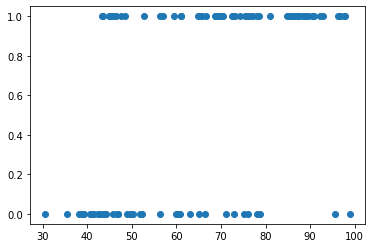

In [4]:
X = df.iloc[:,0:2]
Y = df[2]
plt.scatter(X[1],Y)
plt.show()


## MinMax Normalizaton

In [5]:
for i in range(len(X)):
    X[0] =  ( X[0] - X[0].min() ) / ( X[0].max() - X[0].min() ) 
    X[1] =  ( X[1] - X[1].min() ) / ( X[1].max() - X[1].min() ) 

In [6]:
X.head()

,0,1
0,0.065428,0.694655
1,0.003266,0.194705
2,0.082968,0.619618
3,0.431764,0.816001
4,0.701943,0.655392


## Train Test Split

In [7]:
def predict(X, b):
    preds = []
    for x1, x2 in zip(X.iloc[:,0], X.iloc[:,1]):
        preds.append(1/ (1 + exp((-1*b[0]) + (-1*b[1]*x1) + (-1*b[2]*x2))))
    return preds

In [8]:
def grad_desc(X, Y, b, preds, L=0.001): 
    for i in range(len(b)):
        for j, (y, pred, x1, x2) in enumerate(zip(Y, preds, X.iloc[:,0], X.iloc[:,1])):
            new_bi = L * (y - pred) * (pred) * (1 - pred)
            if(i == 1):
                new_bi *= x1
            elif(i == 2):
                new_bi *= x2
            b[i] += new_bi
    return b

In [9]:
def log_reg(X, Y, b, L=0.001, epochs=3):
    for epoch in range(epochs):
        y_pred = predict(X, b)
        b = grad_desc(X, Y, b, y_pred, L)
    return b

## Test Train Split

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

In [11]:
b = [1,0.5,0.5]
L = 0.3

In [12]:
x_train.shape


(75, 2)

## Logistic Regression

In [13]:
b = log_reg(x_train, y_train, b, L, epochs=5)
b

[-0.901859231620242, 1.1033520281950848, 0.991585612968357]

In [14]:
y_pred = predict(x_test, b)
for i in range(len(y_pred)):
    if y_pred[i]>=0.5:
        y_pred[i]=1
    else:
        y_pred[i]=0

In [15]:
y_pred

[1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0]

## Plot

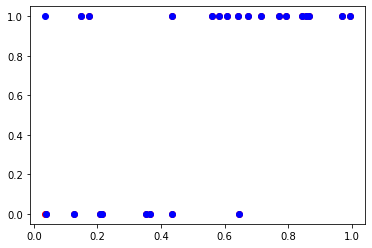

In [16]:
plt.scatter(x_test[0], y_test, c='red')
plt.scatter(x_test[0], y_pred, c='blue')
plt.show()

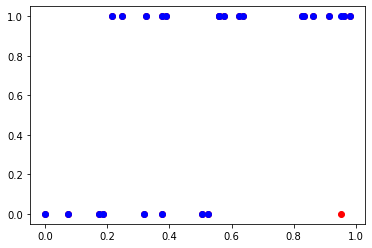

In [17]:
plt.scatter(x_test[1], y_test, c='red')
plt.scatter(x_test[1], y_pred, c='blue')
plt.show()

## Metrics

In [18]:
from sklearn.metrics import classification_report, confusion_matrix


In [19]:
print(confusion_matrix(y_test, y_pred))


[[ 8  1]
 [ 0 16]]


In [20]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.94      1.00      0.97        16

    accuracy                           0.96        25
   macro avg       0.97      0.94      0.96        25
weighted avg       0.96      0.96      0.96        25

